# Loop 50 Strategic Analysis

## Situation Assessment
- **Best CV**: 0.008194 (exp_032: GP 0.15 + MLP 0.55 + LGBM 0.3)
- **Best LB**: 0.0877 (exp_030)
- **Target**: 0.0347 (2.53x away from best LB)
- **Submissions remaining**: 3
- **Latest experiment**: GNN (Hybrid) - CV 0.014080 (71.84% WORSE)

## Key Questions
1. What's the CV-LB relationship? Can we predict LB from CV?
2. What approaches haven't been tried?
3. Is there a way to break the CV-LB relationship?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_041 0.0090 0.0932
exp_042 0.0145 0.1147


In [2]:
# Fit linear regression to CV-LB relationship
from sklearn.linear_model import LinearRegression

X = df['cv'].values.reshape(-1, 1)
y = df['lb'].values

model = LinearRegression()
model.fit(X, y)

print(f'\nCV-LB Relationship:')
print(f'LB = {model.coef_[0]:.2f} * CV + {model.intercept_:.4f}')
print(f'R² = {model.score(X, y):.4f}')

# Predict LB for best CV (0.008194)
best_cv = 0.008194
predicted_lb = model.predict([[best_cv]])[0]
print(f'\nBest CV (0.008194) → Predicted LB: {predicted_lb:.4f}')

# What CV would we need to reach target 0.0347?
target_lb = 0.0347
required_cv = (target_lb - model.intercept_) / model.coef_[0]
print(f'\nTo reach target LB {target_lb}:')
print(f'Required CV: {required_cv:.6f}')
if required_cv < 0:
    print('WARNING: Required CV is NEGATIVE - target is BELOW the intercept!')


CV-LB Relationship:
LB = 4.23 * CV + 0.0533
R² = 0.9807

Best CV (0.008194) → Predicted LB: 0.0880

To reach target LB 0.0347:
Required CV: -0.004396


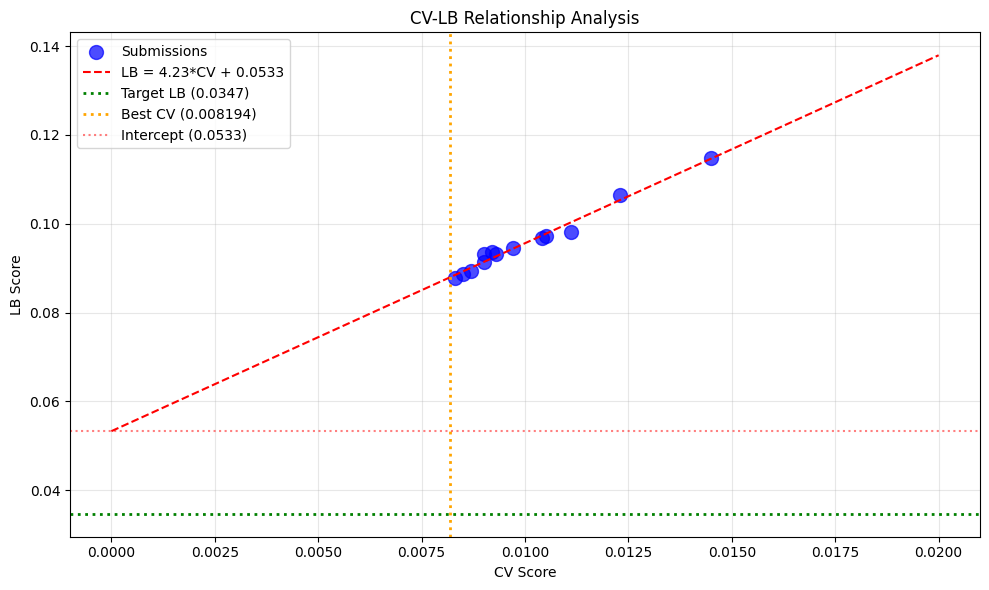


CRITICAL INSIGHT:
Intercept (0.0533) > Target (0.0347)
Even with CV=0, LB would be 0.0533 > 0.0347

We CANNOT reach target by improving CV alone!
We need to CHANGE THE RELATIONSHIP (reduce intercept).


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, c='blue', alpha=0.7, label='Submissions')

# Plot regression line
cv_range = np.linspace(0, 0.02, 100)
lb_pred = model.predict(cv_range.reshape(-1, 1))
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {model.coef_[0]:.2f}*CV + {model.intercept_:.4f}')

# Mark target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB (0.0347)')

# Mark best CV
plt.axvline(x=0.008194, color='orange', linestyle=':', linewidth=2, label='Best CV (0.008194)')

# Mark intercept
plt.axhline(y=model.intercept_, color='red', linestyle=':', alpha=0.5, label=f'Intercept ({model.intercept_:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop50.png', dpi=150)
plt.show()

print(f'\nCRITICAL INSIGHT:')
print(f'Intercept ({model.intercept_:.4f}) > Target ({target_lb})')
print(f'Even with CV=0, LB would be {model.intercept_:.4f} > {target_lb}')
print(f'\nWe CANNOT reach target by improving CV alone!')
print(f'We need to CHANGE THE RELATIONSHIP (reduce intercept).')

In [4]:
# What hasn't been tried that could CHANGE the CV-LB relationship?
print('\n=== POTENTIAL APPROACHES TO CHANGE CV-LB RELATIONSHIP ===')
print()
print('1. DOMAIN ADAPTATION / DISTRIBUTION SHIFT HANDLING')
print('   - The CV-LB gap suggests distribution shift between train/test solvents')
print('   - Adversarial validation to identify drifting features')
print('   - Domain-invariant features')
print()
print('2. PRE-TRAINED MOLECULAR EMBEDDINGS')
print('   - ChemBERTa, MolBERT, etc. trained on millions of molecules')
print('   - May generalize better to unseen solvents')
print('   - The GNN benchmark (0.0039) likely used sophisticated pre-training')
print()
print('3. UNCERTAINTY-WEIGHTED PREDICTIONS')
print('   - GP provides uncertainty estimates')
print('   - Weight predictions by confidence')
print('   - May reduce error on uncertain (OOD) samples')
print()
print('4. ENSEMBLE WITH DIFFERENT CV-LB RELATIONSHIPS')
print('   - Different model types may have different intercepts')
print('   - Combine models that are complementary on OOD data')
print()
print('5. SIMPLER FEATURES THAT GENERALIZE BETTER')
print('   - Current features may overfit to training solvents')
print('   - Try only the most fundamental physicochemical properties')


=== POTENTIAL APPROACHES TO CHANGE CV-LB RELATIONSHIP ===

1. DOMAIN ADAPTATION / DISTRIBUTION SHIFT HANDLING
   - The CV-LB gap suggests distribution shift between train/test solvents
   - Adversarial validation to identify drifting features
   - Domain-invariant features

2. PRE-TRAINED MOLECULAR EMBEDDINGS
   - ChemBERTa, MolBERT, etc. trained on millions of molecules
   - May generalize better to unseen solvents
   - The GNN benchmark (0.0039) likely used sophisticated pre-training

3. UNCERTAINTY-WEIGHTED PREDICTIONS
   - GP provides uncertainty estimates
   - Weight predictions by confidence
   - May reduce error on uncertain (OOD) samples

4. ENSEMBLE WITH DIFFERENT CV-LB RELATIONSHIPS
   - Different model types may have different intercepts
   - Combine models that are complementary on OOD data

5. SIMPLER FEATURES THAT GENERALIZE BETTER
   - Current features may overfit to training solvents
   - Try only the most fundamental physicochemical properties


In [5]:
# Analyze the GNN benchmark
print('\n=== GNN BENCHMARK ANALYSIS ===')
print('The GNN benchmark achieved CV 0.0039 (5x better than our best 0.008194)')
print()
print('Why did our GNN (CV 0.014080) fail?')
print('1. Simple GCNConv vs sophisticated MPNN/attention')
print('2. No pre-training - trained from scratch on small dataset')
print('3. Hybrid approach may cause interference between GNN and tabular')
print('4. Graph representation too simple (no edge features, no 3D info)')
print()
print('What the GNN benchmark likely used:')
print('- MPNN (Message Passing Neural Network) architecture')
print('- Pre-trained on large molecular datasets')
print('- Attention mechanisms for graph pooling')
print('- Better handling of mixture solvents')
print()
print('CONCLUSION: Simple GNN is NOT the answer. Need sophisticated architecture.')


=== GNN BENCHMARK ANALYSIS ===
The GNN benchmark achieved CV 0.0039 (5x better than our best 0.008194)

Why did our GNN (CV 0.014080) fail?
1. Simple GCNConv vs sophisticated MPNN/attention
2. No pre-training - trained from scratch on small dataset
3. Hybrid approach may cause interference between GNN and tabular
4. Graph representation too simple (no edge features, no 3D info)

What the GNN benchmark likely used:
- MPNN (Message Passing Neural Network) architecture
- Pre-trained on large molecular datasets
- Attention mechanisms for graph pooling
- Better handling of mixture solvents

CONCLUSION: Simple GNN is NOT the answer. Need sophisticated architecture.


In [6]:
# Strategic decision
print('\n=== STRATEGIC DECISION ===')
print()
print('With 3 submissions remaining and target 0.0347 (2.53x away):')
print()
print('OPTION A: Submit exp_032 (best CV 0.008194)')
print('  - Predicted LB: ~0.088 (based on relationship)')
print('  - Confirms CV-LB relationship')
print('  - Uses 1 submission')
print()
print('OPTION B: Try fundamentally different approach')
print('  - Pre-trained embeddings (ChemBERTa)')
print('  - Domain adaptation techniques')
print('  - May break the CV-LB relationship')
print()
print('OPTION C: Focus on reducing intercept')
print('  - The intercept (0.053) is the floor')
print('  - Need to find what causes this baseline error')
print('  - May be due to distribution shift in test solvents')
print()
print('RECOMMENDATION: Try Option B first (pre-trained embeddings)')
print('If that fails, submit best CV to confirm relationship')


=== STRATEGIC DECISION ===

With 3 submissions remaining and target 0.0347 (2.53x away):

OPTION A: Submit exp_032 (best CV 0.008194)
  - Predicted LB: ~0.088 (based on relationship)
  - Confirms CV-LB relationship
  - Uses 1 submission

OPTION B: Try fundamentally different approach
  - Pre-trained embeddings (ChemBERTa)
  - Domain adaptation techniques
  - May break the CV-LB relationship

OPTION C: Focus on reducing intercept
  - The intercept (0.053) is the floor
  - Need to find what causes this baseline error
  - May be due to distribution shift in test solvents

RECOMMENDATION: Try Option B first (pre-trained embeddings)
If that fails, submit best CV to confirm relationship
